In [1]:
import brightway2 as bw
import pandas as pd
import numpy as np

In [2]:
bw.projects.set_current('GSA no exiobase')
co = bw.Database('CH consumption 1.0')
average_consump = co.search('average consumption')[0]

In [3]:
average_consump

'ch hh average consumption' (1 month of consumption, CH, None)

In [4]:
list_functional_units = []
for exc in average_consump.exchanges():
    if exc['type'] != 'production':
        list_functional_units.append({exc['input']: exc['amount']})
        
list_methods = [('IPCC 2013', 'climate change', 'GTP 100a')]

In [5]:
bw.calculation_setups['av_consump_contribution_analysis'] = {'inv':list_functional_units, 'ia':list_methods}

In [6]:
%%time
myMultiLCA = bw.MultiLCA('av_consump_contribution_analysis')

CPU times: user 11.8 s, sys: 253 ms, total: 12 s
Wall time: 2.46 s


In [7]:
lcia_unit = bw.Method(list_methods[0]).metadata['unit']

In [8]:
fus = [bw.get_activity(list(el.keys())[0])['name'][:25] for el in list_functional_units]
df = pd.DataFrame(index=fus, columns=[lcia_unit], data=myMultiLCA.results)
df['exchanges'] = [list(fu.values())[0] for fu in list_functional_units]
df['units'] = [bw.get_activity(list(el.keys())[0])['unit'] for el in list_functional_units]


In [9]:
df.sort_values(lcia_unit, ascending=False, inplace=True)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                            kg CO2-Eq   exchanges             units
Gasoline                   471.036510  121.328264             litre
Hard and semi-hard cheese  307.664373   32.790849          kilogram
Sausages, cold meat and p  264.869498   32.736453          kilogram
Beef                       261.201262   23.888668          kilogram
Chocolate                  243.246316   20.076453          kilogram
Pork, fresh or frozen      175.311427   19.597377          kilogram
Ham, bacon and other cure  174.649962   20.571595          kilogram
Fresh, soft and melted ch  151.621308   16.159789          kilogram
Pure and ground coffee     146.230020   18.044207          kilogram
Diesel                     126.072363   28.568768             litre
Veal                       108.447046    9.918235          kilogram
Other boiled, dried, cure   85.065609    6.807338          kilogram
Fish                        74.281201   21.880841          kilogram
Poultry, fresh or frozen    52.604973   21.78438

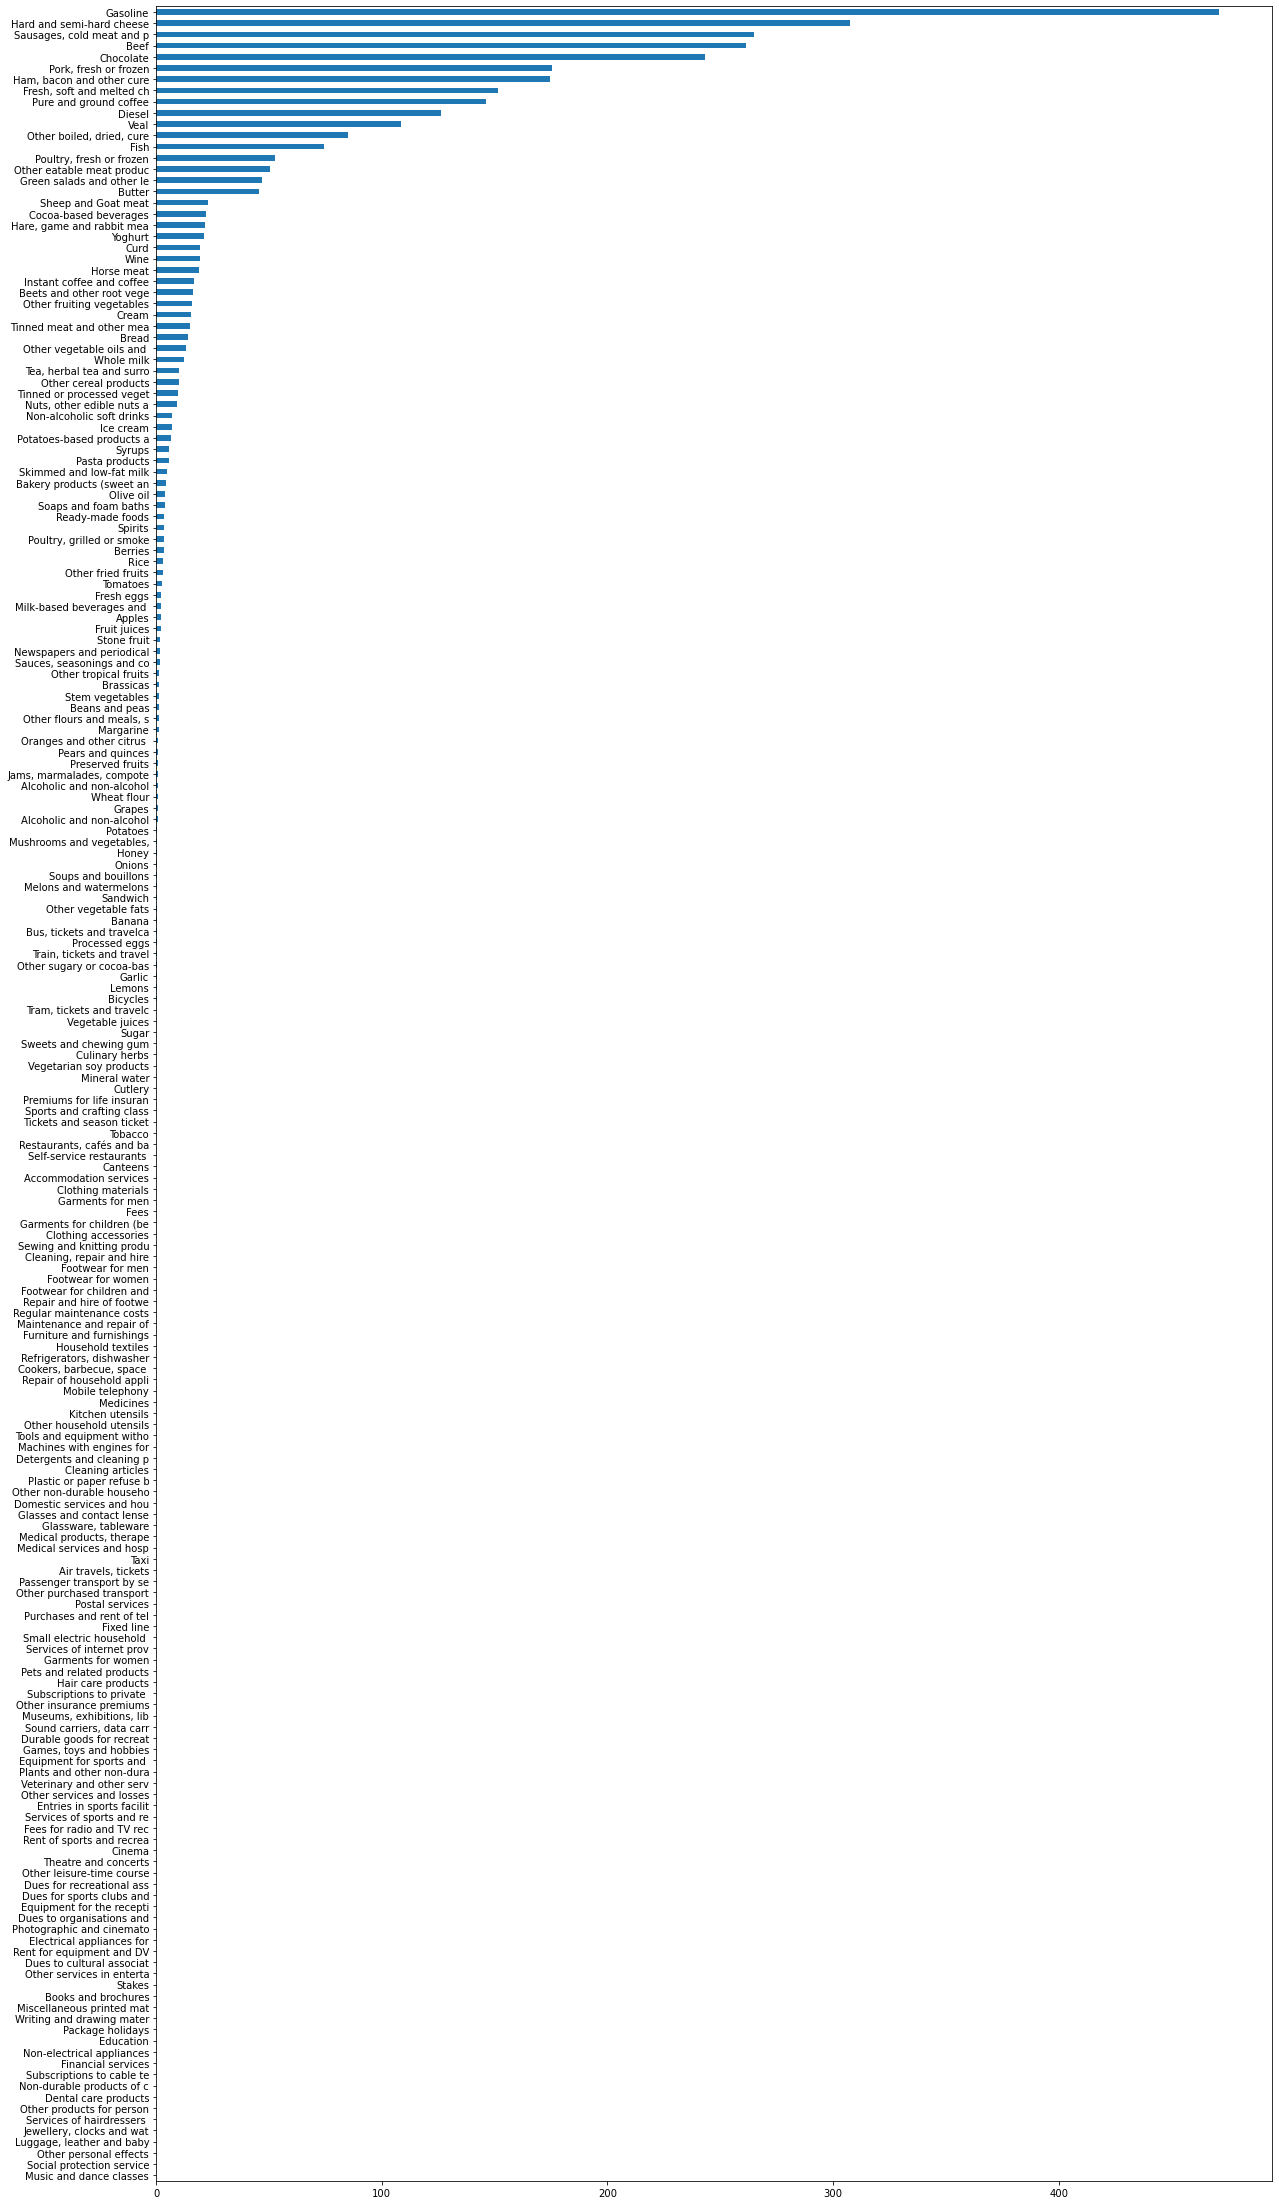

In [12]:
df_ = df.sort_values(lcia_unit)
df_['kg CO2-Eq'].plot.barh(figsize=(20,40))

# Biosphere

In [ ]:
import bw2analyzer

In [ ]:
lca = bw.LCA({average_consump: 1}, list_methods[0])

In [ ]:
lca.lci()
lca.lcia()
lca.score

In [ ]:
ca = bw2analyzer.ContributionAnalysis()

In [ ]:
ca.annotated_top_processes(lca)

# Contribution analysis for sectors

In [ ]:
list_methods = [('IPCC 2013', 'climate change', 'GTP 100a')]
list_fus = []
for cat_of_interest in category_activities:
    list_fus.append({co.search(cat_of_interest)[0]: 1})
    
bw.calculation_setups['sector_contribution_analysis'] = {'inv':list_fus, 'ia':list_methods}

%%time
myMultiLCA = bw.MultiLCA('sector_contribution_analysis')

lcia_unit = bw.Method(list_methods[0]).metadata['unit']

fus = [bw.get_activity(list(el.keys())[0])['name'][:25] for el in list_fus]
df = pd.DataFrame(index=fus, columns=[lcia_unit], data=myMultiLCA.results)
df['units'] = [bw.get_activity(list(el.keys())[0])['unit'] for el in list_fus]

df.sort_values(lcia_unit, ascending=False, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)